In [1]:
# test the fitting:
# Chi2 on lag-hr, hard bound = False

In [2]:
import pickle
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from optimization_utils import param_vec_to_dict, make_boundary

In [3]:
folder = "0829_Chi2Log_100_100/"

In [4]:
file_list = glob.glob(folder + "outfiles/*data*.pkl")
file_list = [i.replace(folder + "outfiles/","") for i in file_list]
file_list = [i.replace(".pkl","") for i in file_list]
file_list = [tuple(map(int,i.split("data"))) for i in file_list]
file_list.sort()
# file_list

In [5]:
pso_df = pd.DataFrame(columns = ['iter','particle','err'])
_, _, what_to_fit = make_boundary()

for iter, p in file_list:
    path = folder + "outfiles/" + str(iter) + "data" + str(p) + ".pkl" 
    with open(path, 'rb') as inp:
        data = pickle.load(inp)
    if len(data) != 0:
        err = data['err']
        params = data['params']
        row_dict = {"iter":iter,"particle":p,"err":err}
        row_dict.update({what_to_fit[i]:params[i] for i in range(len(params))})
        pso_df = pso_df.append(row_dict,ignore_index=True)
    
pso_df

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
0,1.0,0.0,815.787449,0.657649,0.775973,0.284247,0.746500,0.524809,0.478012
1,1.0,1.0,815.787449,0.575501,0.048947,0.189767,0.745963,0.235933,0.579617
2,1.0,2.0,815.787449,0.521211,0.821357,0.916667,0.234936,0.747626,0.522396
3,1.0,3.0,289.467039,0.678978,0.688572,0.318694,0.886923,0.060595,0.751931
4,1.0,4.0,3952.351884,0.331431,0.279079,0.605592,0.717467,0.335090,0.302118
...,...,...,...,...,...,...,...,...,...
9995,100.0,95.0,527.057666,0.870773,0.027681,0.522974,0.776140,0.019149,1.000000
9996,100.0,96.0,731.740639,0.898038,0.613538,0.528255,0.758797,0.039457,0.999921
9997,100.0,97.0,3952.351884,0.899604,0.019232,0.580939,0.831053,0.031714,1.000000
9998,100.0,98.0,785.782346,0.900000,0.234157,0.010000,0.883404,0.037424,1.000000


In [6]:
pso_df.loc[pso_df.iter == 50]

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
4900,50.0,0.0,2713.472869,0.659017,0.883342,0.496541,0.833158,0.049546,0.998873
4901,50.0,1.0,100.489341,0.900000,0.073971,0.580291,0.753477,0.010428,0.950580
4902,50.0,2.0,815.787449,0.900000,0.058301,0.404674,0.477967,0.232479,0.925091
4903,50.0,3.0,3952.351884,0.900000,0.076625,0.393511,0.961430,0.017601,1.000000
4904,50.0,4.0,709.106689,0.878743,0.295524,0.117221,0.894721,0.059913,1.000000
...,...,...,...,...,...,...,...,...,...
4995,50.0,95.0,3952.351884,0.662727,0.214974,0.517572,0.838634,0.075931,0.777814
4996,50.0,96.0,313.840658,0.899535,0.607774,0.561767,0.780677,0.087962,0.997584
4997,50.0,97.0,3952.351884,0.899123,0.161492,0.747566,0.825599,0.157474,0.998005
4998,50.0,98.0,3952.351884,0.900000,0.325987,0.743856,0.765530,0.058915,0.997238


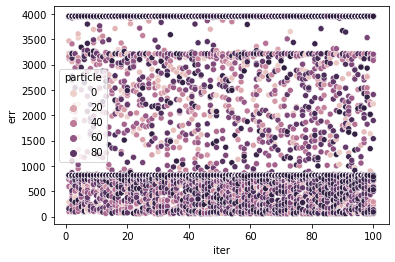

In [7]:
sns.scatterplot(data=pso_df, x="iter", y="err", hue="particle")
plt.show()

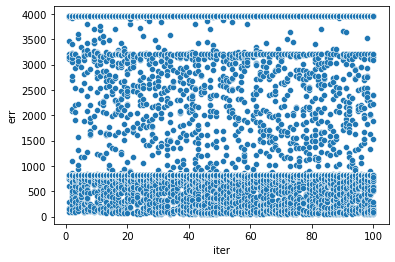

In [8]:
sns.scatterplot(data=pso_df, x="iter", y="err")
plt.show()

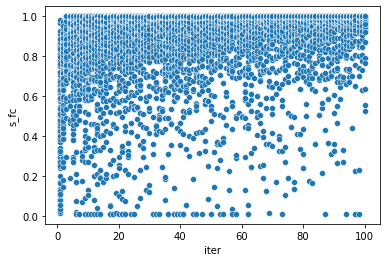

In [9]:
sns.scatterplot(data=pso_df, x="iter", y="s_fc")
plt.show()

In [10]:
param_vec = np.loadtxt('/home1/beigejin/MyCMR2/Modeling/CMR2/fitting/' + folder + 'outfiles/xoptb.txt')
prams = param_vec_to_dict(param_vec)
prams

{'beta_enc': 0.899631,
 'beta_rec': 0.171151,
 'beta_rec_post': 0.535656,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 1.0,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.78749,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'gamma_fc': 0.017199,
 'gamma_cf': 0.5}

### Run CMR2 on the Best Params

In [11]:
import CMR2_jbg as cmr
pd.set_option('display.max_columns', None)
np.set_printoptions(edgeitems=20, linewidth=200,precision=4)

In [12]:
rng = np.random.default_rng(seed=42)

In [13]:
# import recognition dataframe
with open("/home1/beigejin/Recog_David/data_als/data_df_clean.pkl", 'rb') as inp:
    df = pickle.load(inp)
df

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length,itemno,session
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0,53,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0,26,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0,33,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1,151,0
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0,18.0,18,60,547
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1,23.0,23,10,547
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1,19.0,19,265,547
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0,NaN,23,213,547


In [14]:
s_mat = np.load('/home1/beigejin/Recog_David/data_als/semantic_mat_fasttext.npy')

In [15]:
df_simu = cmr.run_continuous_recog_multi_sess(prams,df,s_mat)
df_simu

CMR Time: 235.22004675865173


,session,position,itemno,s_resp,s_rt,csim
57307,0,0,53,0.0,0.0,0.000000
57766,0,1,26,0.0,0.0,0.726662
58224,0,2,33,0.0,0.0,0.769877
58695,0,3,151,0.0,0.0,0.785783
59159,0,4,187,1.0,0.0,0.816676
...,...,...,...,...,...,...
337333,547,575,60,1.0,0.0,0.810892
337508,547,576,10,1.0,0.0,0.790712
337682,547,577,265,1.0,0.0,0.800563
337870,547,578,213,0.0,0.0,0.778995


In [16]:
df_new = df_simu.merge(df,on=['session','position','itemno'])
df_new

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length
0,0,0,53,0.0,0.0,0.000000,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,False,0,NaN,0
1,0,1,26,0.0,0.0,0.726662,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,False,0,NaN,0
2,0,2,33,0.0,0.0,0.769877,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,False,0,NaN,0
3,0,3,151,0.0,0.0,0.785783,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,False,0,NaN,1
4,0,4,187,1.0,0.0,0.816676,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,False,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317835,547,575,60,1.0,0.0,0.810892,1911.000,656,COLA,37,Beverages,2.0,Beverages,True,0,18.0,18
317836,547,576,10,1.0,0.0,0.790712,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23
317837,547,577,265,1.0,0.0,0.800563,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19
317838,547,578,213,0.0,0.0,0.778995,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,True,0,NaN,23


In [17]:
f = folder.rstrip("/")

In [18]:
with open('/home1/beigejin/Recog_David/data_als/data_df_simu_' + f + '.pkl', 'wb') as outp:
    pickle.dump(df_new, outp, pickle.HIGHEST_PROTOCOL)

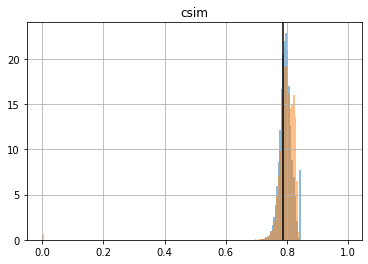

In [30]:
bin_arr = np.arange(0,1,0.005)
df_tar = df_new.loc[df_new.old == True]
df_lure = df_new.loc[df_new.old == False]

fig, ax = plt.subplots()
df_tar.hist(column = 'csim', bins=bin_arr, ax = ax, density = True,alpha=0.5)
df_lure.hist(column = 'csim', bins=bin_arr, ax = ax, density = True, alpha=0.5)
plt.axvline(prams["c_thresh"], color = 'k')
plt.show()